# Detecting pneumonia

Data from Kaggle: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [1]:
#Imports
import numpy as np
import os
import shutil
import glob
import itertools
import random
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
#Preferences
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

### Data preparation

In [3]:
#Path variables
train_path = "data/train"
val_path = "data/val"
test_path = "data/test"

In [6]:
#Creates Keras image generator with VGG16 preprocessing
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path, target_size=(2090,1858), classes=["NORMAL","PNEUMONIA"], batch_size=10)

Found 5216 images belonging to 2 classes.


In [7]:
#Creates Keras image generator with VGG16 preprocessing
val_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=val_path, target_size=(2090,1858), classes=["NORMAL","PNEUMONIA"], batch_size=10)

Found 16 images belonging to 2 classes.


In [8]:
#Creates Keras image generator with VGG16 preprocessing
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path, target_size=(2090,1858), classes=["NORMAL","PNEUMONIA"], batch_size=10, shuffle=False)

Found 624 images belonging to 2 classes.


In [9]:
imgs, labels = next(train_batches)

In [14]:
#Builds plotting function
def plotImages(images_arr):
    """
    Plots images in a grid.
    """
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

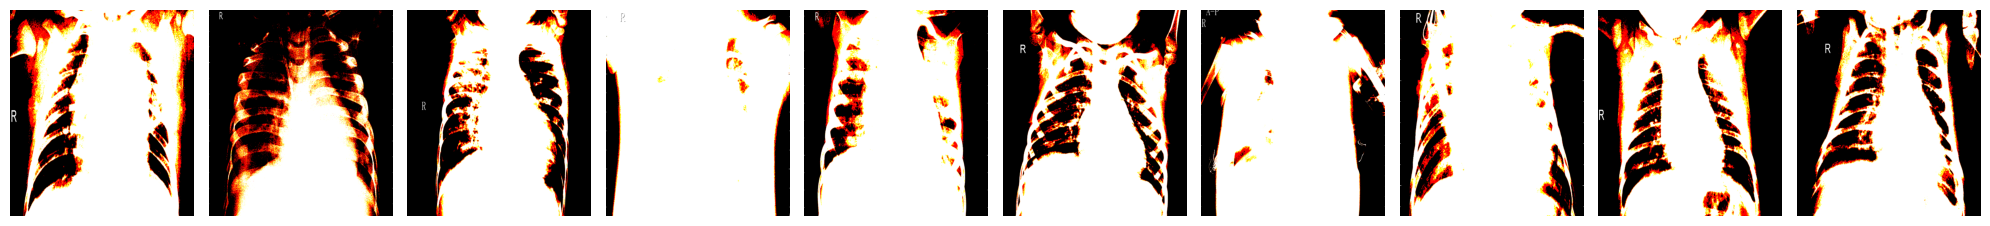

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [15]:
plotImages(imgs)
print(labels)